In [1]:
import time

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import cross_val_score

In [2]:
raw_data = pd.read_csv('epicurious-recipes-with-rating-and-nutrition/epi_r.csv')

In [3]:
raw_data

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Ham and Spring Vegetable Salad with Shallot Vi...,4.375,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Spicy-Sweet Kumquats,3.750,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,3.750,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

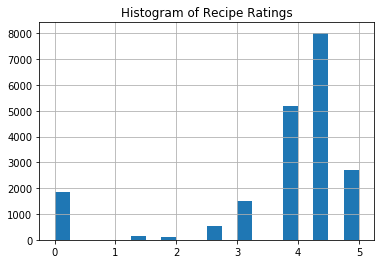

In [6]:
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
null_count = raw_data.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
"""time1 = time.time()"""

'time1 = time.time()'

In [9]:
"""from sklearn.svm import SVR
svr = SVR()
X = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = raw_data.rating
svr.fit(X,Y)"""

"from sklearn.svm import SVR\nsvr = SVR()\nX = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)\nY = raw_data.rating\nsvr.fit(X,Y)"

In [10]:
"""time2 = time.time()
time2-time1"""

'time2 = time.time()\ntime2-time1'

In [11]:
"""plt.scatter(Y, svr.predict(X))"""

'plt.scatter(Y, svr.predict(X))'

In [12]:
"""svr.score(X, Y)"""

'svr.score(X, Y)'

In [13]:
"""from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)"""

'from sklearn.model_selection import cross_val_score\ncross_val_score(svr, X, Y, cv=5)'

# Feature Set 1

In [14]:
features = pd.DataFrame(raw_data.dropna())

In [15]:
features.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
for column in features.columns:
    if features[column].max() == 0:
        features.drop(column, axis=1, inplace=True)

# Did the recipe get a '3.0' or higher?

In [17]:
def highlow(x):
    if x >= 3.0:
        return 1
    else:
        return 0

In [18]:
features['rating'] = features['rating']*.8

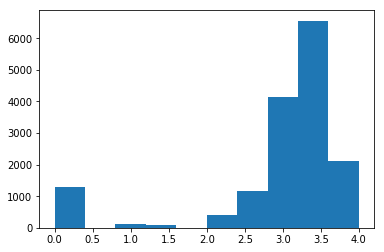

In [19]:
plt.hist(features['rating'])
plt.show()

In [20]:
features['rating'].value_counts()

3.5    6552
3.0    4136
4.0    2106
0.0    1296
2.5    1165
2.0     405
1.0     123
1.5      81
Name: rating, dtype: int64

In [21]:
features['rating'].describe()

count    15864.000000
mean         3.008762
std          1.028414
min          0.000000
25%          3.000000
50%          3.500000
75%          3.500000
max          4.000000
Name: rating, dtype: float64

In [22]:
print(len(features[features['rating'] >= 3]))
print(len(features[features['rating'] < 3]))

12794
3070


In [23]:
features['rating'] = features['rating'].apply(lambda x: highlow(x))

In [24]:
features

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,1,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,1,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,0,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,1,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Korean Marinated Beef,1,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Ham Persillade with Mustard Potato Salad and M...,1,602.0,23.0,41.0,1696.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,"Yams Braised with Cream, Rosemary and Nutmeg",1,256.0,4.0,5.0,30.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Banana-Chocolate Chip Cake With Peanut Butter ...,1,766.0,12.0,48.0,439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,Beef Tenderloin with Garlic and Brandy,1,174.0,11.0,12.0,176.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVC

In [25]:
from sklearn.svm import SVC

In [26]:
"""time3 = time.time()"""

'time3 = time.time()'

In [27]:
"""svc = SVC()
X = features.drop(['rating', 'title'], 1)
Y = features.rating
svc.fit(X,Y)"""

"svc = SVC()\nX = features.drop(['rating', 'title'], 1)\nY = features.rating\nsvc.fit(X,Y)"

In [28]:
"""time4 = time.time()
time4-time3"""

'time4 = time.time()\ntime4-time3'

In [29]:
"""plt.scatter(Y, svc.predict(X))"""

'plt.scatter(Y, svc.predict(X))'

In [30]:
"""svc.score(X, Y)"""

'svc.score(X, Y)'

svc.score(X, Y) = 0.83705244578920823

In [31]:
0.76172465960665658**2

0.5802244570528768

In [32]:
"""cross_val_score(svc, X, Y, cv=5)"""

'cross_val_score(svc, X, Y, cv=5)'

# Feature Selection

In [33]:
(features[features == 0].count()/features.count()).sort_values()

title                      0.000000
calories                   0.000504
sodium                     0.003278
protein                    0.052068
fat                        0.076778
rating                     0.193520
bon appétit                0.534607
peanut free                0.576336
soy free                   0.590141
gourmet                    0.641768
tree nut free              0.645991
vegetarian                 0.651475
kosher                     0.685767
pescatarian                0.692637
quick & easy               0.734556
wheat/gluten-free          0.754097
bake                       0.765192
summer                     0.795134
dessert                    0.813918
winter                     0.837305
side                       0.838502
fall                       0.842410
dairy free                 0.843041
no sugar added             0.847579
kidney friendly            0.878782
sugar conscious            0.879223
dinner                     0.880358
onion                      0

In [34]:
most_nonzero = (features[features == 0].count()).sort_values()[:30].index.values

In [35]:
X = features[most_nonzero].drop(['rating', 'title'], 1)
Y = features.rating

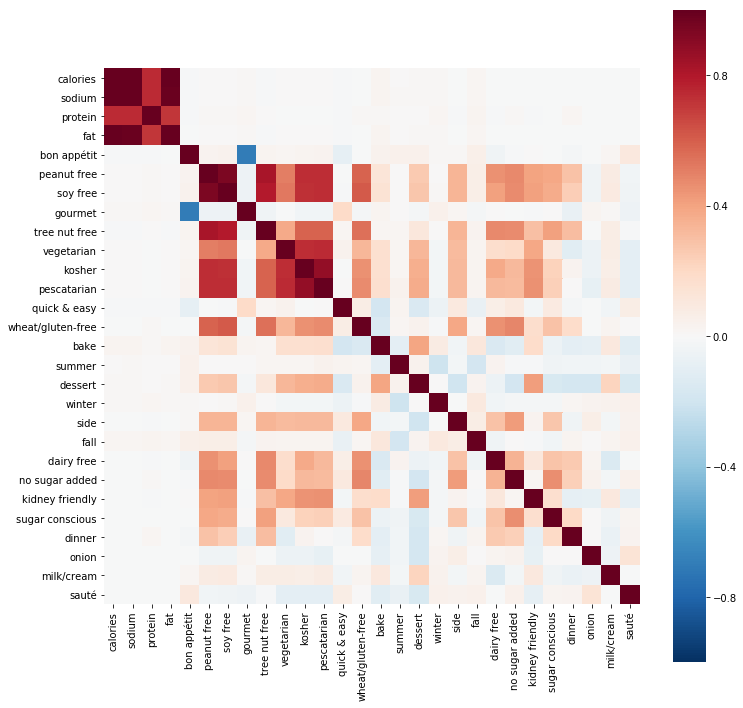

In [36]:
plt.rcParams['figure.figsize'] = 12, 12

sns.heatmap(X.corr(), vmin=-1, vmax=1, square=True, cmap='RdBu_r')

plt.show()

# Reduced Set

In [37]:
svc = SVC()
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [38]:
cvscore = cross_val_score(svc, X, Y, cv=5)

print(cvscore)
print(cvscore.mean())

[ 0.82697762  0.82319571  0.82445635  0.82760794  0.82660782]
0.825769089683


In [39]:
print(most_nonzero)

['title' 'calories' 'sodium' 'protein' 'fat' 'rating' 'bon appétit'
 'peanut free' 'soy free' 'gourmet' 'tree nut free' 'vegetarian' 'kosher'
 'pescatarian' 'quick & easy' 'wheat/gluten-free' 'bake' 'summer' 'dessert'
 'winter' 'side' 'fall' 'dairy free' 'no sugar added' 'kidney friendly'
 'sugar conscious' 'dinner' 'onion' 'milk/cream' 'sauté']


In [40]:
def plotcolumn(plotterm, features=features):
    plt.rcParams['figure.figsize'] = 12, 8
    fig = plt.figure()

    fig.add_subplot(231)
    plt.hist(features[plotterm])
    plt.title('{} Raw'.format(plotterm))

    fig.add_subplot(232)
    plt.hist(np.log(features[plotterm]+1))
    plt.title('{} Log'.format(plotterm))

    fig.add_subplot(233)
    plt.hist((features[plotterm])**2)
    plt.title('{} Square'.format(plotterm))
    
    fig.add_subplot(235)
    plt.hist(np.sqrt(features[plotterm]+1))
    plt.title('{} Square Root'.format(plotterm))
    
    ax3=fig.add_subplot(236)
    plt.hist(1/(features[plotterm]+1))
    plt.title('{} Inverse'.format(plotterm))
    plt.xticks(rotation=90)
    plt.show()

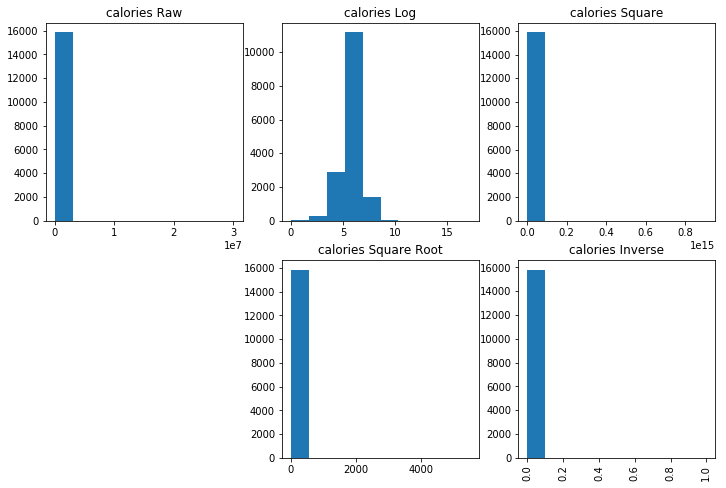

In [41]:
plotcolumn('calories')

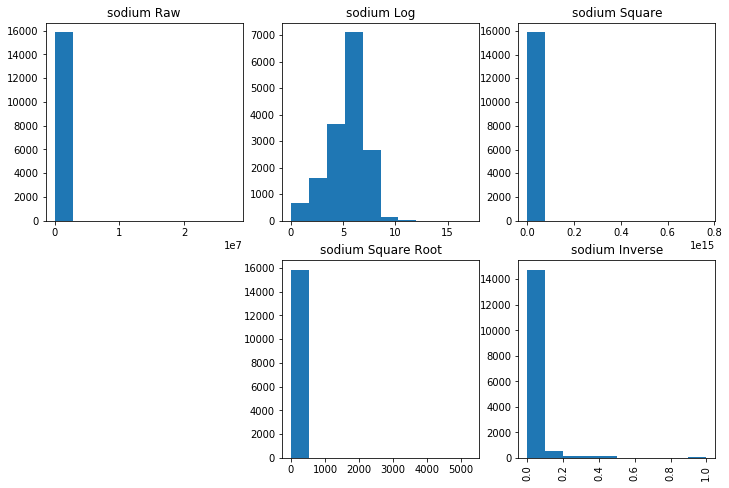

In [42]:
plotcolumn('sodium')

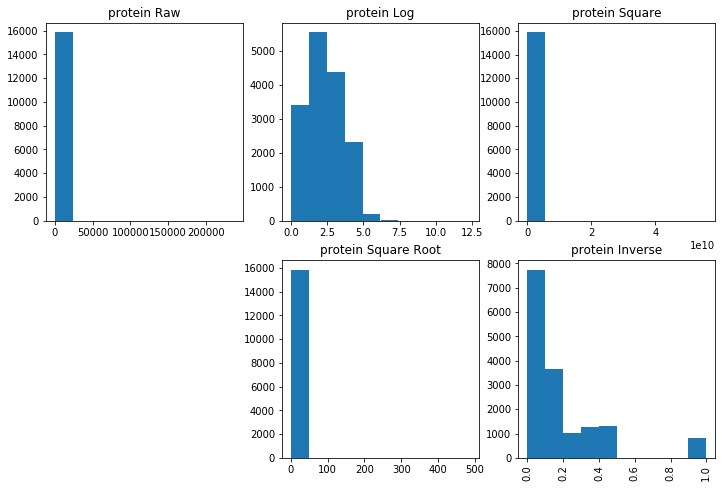

In [43]:
plotcolumn('protein')

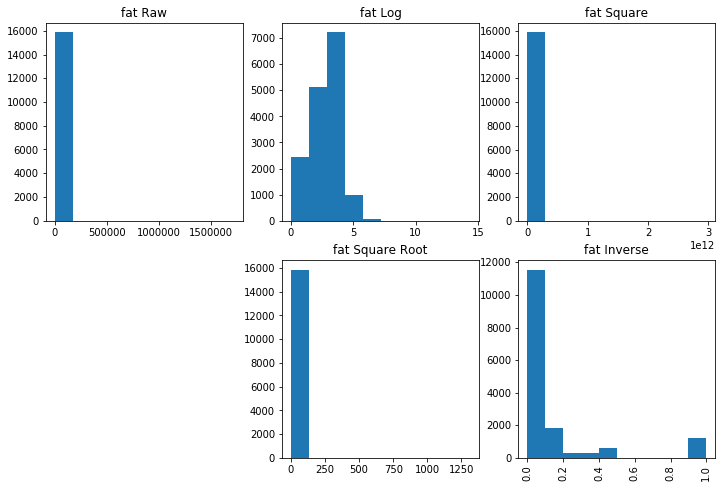

In [44]:
plotcolumn('fat')

# Feature Engineering Part 2

In [64]:
features2 = pd.DataFrame(features)

In [65]:
"""nutritionfacts = ['calories', 'sodium', 'protein', 'fat']

for metric in nutritionfacts:
    features2[metric] = np.log(features2[metric]+1)"""

"nutritionfacts = ['calories', 'sodium', 'protein', 'fat']\n\nfor metric in nutritionfacts:\n    features2[metric] = np.log(features2[metric]+1)"

In [66]:
dietaryrestrictions = ['peanut free', 'soy free', 'tree nut free', 'kosher', 'pescatarian', 'vegetarian']

In [67]:
means = features2[dietaryrestrictions].mean(axis=0)
stds = features2[dietaryrestrictions].std(axis=0)
features2['dietaryrestrictions'] = ((features2[dietaryrestrictions] - means) / stds).mean(axis=1)
features2['dietaryrestrictions'] = features2['dietaryrestrictions'] - features2['dietaryrestrictions'].min()
features2['dietaryrestrictions'] = features2['dietaryrestrictions']/features2['dietaryrestrictions'].max()

In [68]:
features2.drop(dietaryrestrictions, 1, inplace=True)

In [69]:
most_nonzero2 = (features2[features2== 0].count()).sort_values()[:30].index.values

In [70]:
X = features[most_nonzero2].drop(['rating', 'title'], 1)
Y = features.rating

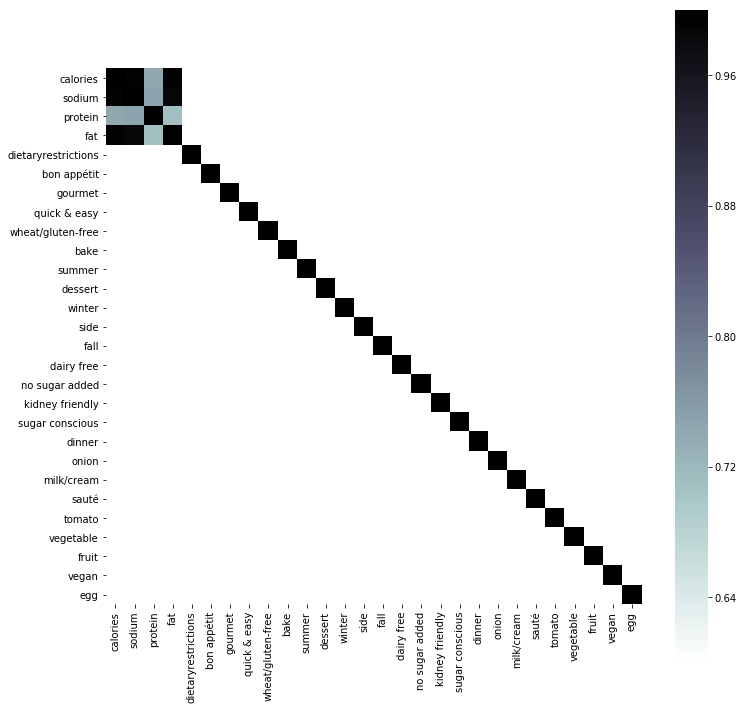

In [71]:
plt.rcParams['figure.figsize'] = 12, 12

sns.heatmap(X.corr(), vmin=0.60, vmax=1, square=True, cmap='bone_r')

plt.show()

In [72]:
svc = SVC()
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
cvscore = cross_val_score(svc, X, Y, cv=5)

print(cvscore)
print(cvscore.mean())

[ 0.82729278  0.82477151  0.82319571  0.82697762  0.82755359]
0.82595824479


# Conclusion:

Accuracy depends on where the division is for the binary target variable; splitting the rating at 3.0 vs. 3.5 affects the R-squared value.